<a href="https://colab.research.google.com/github/1985shree/1985shree/blob/main/tender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is data from company OfBusiness

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer
import re
import spacy
# nlp = spacy.load('en_core_web_lg')
# spacy_tokenizer = Tokenizer(nlp.vocab)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('tender.csv')

# understand the data

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tender_id,tender_description,tender_details,tender_category,boq_items,boq_details,boq_len
0,0,0,ad77c36d-ee5b-415a-917b-f65a81752625,Construction Of Rcc Drain With Cover Slab From...,Construction Of Rcc Drain With Cover Slab From...,Works,"[{'rowNumber': 12, 'itemDescription': 'Dismant...",['Dismantling and removing cement concrete inc...,11
1,1,1,d17ff512-0f4e-4e63-b9c0-4b4c13157f47,Day To Day Upkeeping Of Lawn And Garden At Koy...,Day To Day Upkeeping Of Lawn And Garden At Koy...,Works,"[{'rowNumber': 21, 'itemDescription': 'Shiftin...",['Shifting of Ghamlas from garden to 1 to 10 t...,29
2,2,2,d5d6a926-6dec-473c-b6f4-c195e1c334f2,"P/l Wmb G-ii, 75 Mm Thick Wet Mix Macadam And ...","P/l Wmb G-ii, 75 Mm Thick Wet Mix Macadam And ...",Works,"[{'rowNumber': 12, 'itemDescription': 'Providi...","['Providing , laying, spreading and compacting...",4
3,3,3,67bab7b5-b577-481f-a64f-f52a9e89a13f,Improvement And Biannual Maintenance To Anjang...,Improvement And Biannual Maintenance To Anjang...,Works,"[{'rowNumber': 12, 'itemDescription': 'IMPROVE...",['IMPROVEMENT AND BIANNUAL MAINTENANCE TO ANJA...,1
4,4,4,a47aeaf3-7b4d-4551-8d7e-c0415f65f411,Pre-monsoon Cleaning And Desilting Of,Pre-monsoon Cleaning And Desilting Of Exisitin...,Works,"[{'rowNumber': 18, 'itemDescription': 'GST 12%...","['GST 12%', 'PROVIDING AND OPERATING DUMPER OF...",6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          100 non-null    int64 
 1   Unnamed: 0.1        100 non-null    int64 
 2   tender_id           100 non-null    object
 3   tender_description  100 non-null    object
 4   tender_details      100 non-null    object
 5   tender_category     91 non-null     object
 6   boq_items           100 non-null    object
 7   boq_details         100 non-null    object
 8   boq_len             100 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [ ]:
df.describe() # has unnecessary columns...need to drop

,Unnamed: 0,Unnamed: 0.1,boq_len
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,7.150000
std,29.011492,29.011492,11.461287
min,0.000000,0.000000,0.000000
25%,24.750000,24.750000,0.000000
50%,49.500000,49.500000,1.000000
75%,74.250000,74.250000,9.000000
max,99.000000,99.000000,58.000000


## Find null and replace with another category (seemed an appropriate way to deal with this data)

<AxesSubplot:>

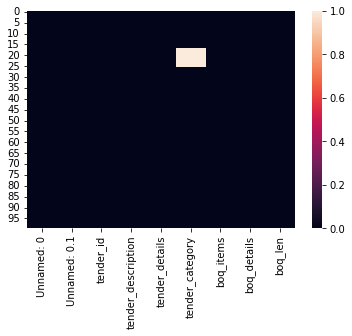

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.tender_category.fillna('Missing', inplace = True)

In [ ]:
df_null = df[df['tender_category'] == 'Missing']

In [ ]:
df_null

,Unnamed: 0,Unnamed: 0.1,tender_id,tender_description,tender_details,tender_category,boq_items,boq_details,boq_len
17,17,17,d82cf3e9-5ce9-4f64-93f8-518a86c6e683,All That Piece And Parcel Of Vacant Land Situa...,All That Piece And Parcel Of Vacant Land Situa...,Missing,"[{'rowNumber': 1, 'itemDescription': 'All that...",['All that piece and parcel of vacant land sit...,1
18,18,18,aff8bc20-0f92-4b89-96c6-1dce10096acb,The House Site Plot No.70 Extending To East We...,The House Site Plot No.70 Extending To East We...,Missing,"[{'rowNumber': 1, 'itemDescription': 'The Hous...",['The House site plot No.70 extending to east ...,3
19,19,19,e84fe8b8-e7da-4e54-a785-515e83931867,All That Piece And Parcel Of Land Residential ...,All That Piece And Parcel Of Land Residential ...,Missing,"[{'rowNumber': 1, 'itemDescription': 'All that...",['All that piece and parcel of land residentia...,1
20,20,20,402f196a-9f17-46a5-aa26-308b385d45d3,All That Piece And Parcel Of Land Measuring An...,All That Piece And Parcel Of Land Measuring An...,Missing,"[{'rowNumber': 1, 'itemDescription': 'All that...",['All that piece and parcel of land measuring ...,1
21,21,21,218dfa74-b2dd-4b90-af00-a17fc3843cb9,"In Madurai Tirumangalam Dist No.4, Rajaji 1st ...","In Madurai Tirumangalam Dist No.4, Rajaji 1st ...",Missing,"[{'rowNumber': 2, 'itemDescription': 'In Madur...","['In Madurai District, Madurai South Registrat...",2
22,22,22,4581e12b-b3b3-4e5f-a632-e22d42325b6f,Residential Land And Building At Kanyakumari D...,Residential Land And Building At Kanyakumari D...,Missing,"[{'rowNumber': 2, 'itemDescription': 'Resident...",['Residential land and building situated at ka...,2
23,23,23,cbe762db-d28f-4c12-ad0e-6ae809dfd71f,All That Piece And Parcel Of Land Residential ...,All That Piece And Parcel Of Land Residential ...,Missing,"[{'rowNumber': 1, 'itemDescription': 'All that...",['All that piece and parcel of land residentia...,1
24,24,24,62dd9eea-73b0-4662-a12c-25e343be34e1,"Virudhunagar Dist,thiruthangal Village Sivakas...","Virudhunagar Dist,thiruthangal Village Sivakas...",Missing,"[{'rowNumber': 1, 'itemDescription': 'Virudhun...","['Virudhunagar dist,Thiruthangal village sivak...",1
25,25,25,87acb60f-e597-4ad9-99e6-ec14935ce862,Thiruvanathapuram Dist Balaramapuram Village S...,Thiruvanathapuram Dist Balaramapuram Village S...,Missing,"[{'rowNumber': 1, 'itemDescription': 'Thiruvan...",['Thiruvanathapuram dist Balaramapuram Village...,1


# understand the problem

In [ ]:
df.tender_category.value_counts()

WORKS         29
Works         25
SERVICES      13
PERCENTAGE    10
Missing        9
Services       6
Goods          4
ITEM RATE      2
GOODS          2
Name: tender_category, dtype: int64

In [ ]:
df.shape

(100, 12)

## requires multiclass classification. text data

'['

In [ ]:
extracted_lst1[0]

"[{'rowNumber':"

In [ ]:

# data0 = json.loads(df.boq_items[0])

In [ ]:
data0[0].keys()

dict_keys(['rowNumber', 'itemDescription', 'quantity', 'units', 'rate', 'amount', '_class'])

In [ ]:
# class Extractors():


#   def json_extractor(self, file, new_col_val):
#     self.new_col_value = new_col_value
#     self.file = file
#     corrected = self.file.replace("'", '"')
#     temp_data = json.loads(corrected)
#     self.new_col_value = []
#     for f in temp_data:
#       val = self.new_col_value.append(temp_data[f'{self.new_col_value}'])
    
#     return val




In [ ]:
df.boq_items[0]

"[{'rowNumber': 12, 'itemDescription': 'Dismantling and removing cement concrete including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'quantity': 9.0, 'units': 'Cum', 'rate': 5268.6, 'amount': 585.4, '_class': 'com.ofb.core.domain.mongo.BOQ'}, {'rowNumber': 13, 'itemDescription': 'Dismantling and removing RCC including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'quantity': 24.0, 'units': 'Cum', 'rate': 28015.2, 'amount': 1167.3, '_class': 'com.ofb.core.domain.mongo.BOQ'}, {'rowNumber': 14, 'itemDescription': 'Earthwork excavation of foundation in all kinds of soil with all leads ,lifts,delifts,including rough dressing and levelling the bed and depositing the excavated earth away from work site and breaking the clods to maximum 5cm to 7cm in size and laying in layers not exceeding 0.30m in depth 

In [ ]:
df.boq_details[0]

"['Dismantling and removing cement concrete including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'Dismantling and removing RCC including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'Earthwork excavation of foundation in all kinds of soil with all leads ,lifts,delifts,including rough dressing and levelling the bed and depositing the excavated earth away from work site and breaking the clods to maximum 5cm to 7cm in size and laying in layers not exceeding 0.30m in depth etc complete as per direction of the Engineer-in-charge.', 'Filling foundation and plinth with sand well watered and rammed with cost , conveyance , royalty ,taxes,labour , T & P , cess etc complete as per direction of the Engineer-in-charge.', 'Cement Concrete  (1:3:6) with 40mm size  hard granite crusher broken metal including all

## Possible useful functions for later

In [ ]:
def json_extractor_quant(file):

    
  corrected = file.replace("'", '"')
  temp_data = json.loads(corrected)
  temp_value = []
  for fl in temp_data:
    temp_value.append(fl['quantity'])
  return temp_value

In [ ]:
def json_extractor_units(file):

    
  corrected = file.replace("'", '"')
  temp_data = json.loads(corrected)
  temp_value = []
  for fl in temp_data:
    temp_value.append(fl['units'])
  return temp_value


In [ ]:
def json_extractor_rate(file):

    
  corrected = file.replace("'", '"')
  temp_data = json.loads(corrected)
  temp_value = []
  for fl in temp_data:
    temp_value.append(fl['rate'])
  return temp_value


In [ ]:
def json_extractor_amount(file):

    
  corrected = file.replace("'", '"')
  temp_data = json.loads(corrected)
  temp_value = []
  for fl in temp_data:
    temp_value.append(fl['amount'])
  return temp_value


In [ ]:
def json_extractor_class(file):

    
  corrected = file.replace("'", '"')
  temp_data = json.loads(corrected)
  temp_value = []
  for fl in temp_data:
    temp_value.append(fl['_class'])
  return temp_value


In [ ]:
print(json_extractor(df.boq_items[0]))

['Dismantling and removing cement concrete including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'Dismantling and removing RCC including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'Earthwork excavation of foundation in all kinds of soil with all leads ,lifts,delifts,including rough dressing and levelling the bed and depositing the excavated earth away from work site and breaking the clods to maximum 5cm to 7cm in size and laying in layers not exceeding 0.30m in depth etc complete as per direction of the Engineer-in-charge.', 'Filling foundation and plinth with sand well watered and rammed with cost , conveyance , royalty ,taxes,labour , T & P , cess etc complete as per direction of the Engineer-in-charge.', 'Cement Concrete  (1:3:6) with 40mm size  hard granite crusher broken metal including all 

# Checking out text data from the df. We'll put all text data into one column, categorize target by hand and classify with multiclass classifiers

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tender_id,tender_description,tender_details,tender_category,boq_items,boq_details,boq_len
0,0,0,ad77c36d-ee5b-415a-917b-f65a81752625,Construction Of Rcc Drain With Cover Slab From...,Construction Of Rcc Drain With Cover Slab From...,Works,"[{'rowNumber': 12, 'itemDescription': 'Dismant...",['Dismantling and removing cement concrete inc...,11
1,1,1,d17ff512-0f4e-4e63-b9c0-4b4c13157f47,Day To Day Upkeeping Of Lawn And Garden At Koy...,Day To Day Upkeeping Of Lawn And Garden At Koy...,Works,"[{'rowNumber': 21, 'itemDescription': 'Shiftin...",['Shifting of Ghamlas from garden to 1 to 10 t...,29
2,2,2,d5d6a926-6dec-473c-b6f4-c195e1c334f2,"P/l Wmb G-ii, 75 Mm Thick Wet Mix Macadam And ...","P/l Wmb G-ii, 75 Mm Thick Wet Mix Macadam And ...",Works,"[{'rowNumber': 12, 'itemDescription': 'Providi...","['Providing , laying, spreading and compacting...",4
3,3,3,67bab7b5-b577-481f-a64f-f52a9e89a13f,Improvement And Biannual Maintenance To Anjang...,Improvement And Biannual Maintenance To Anjang...,Works,"[{'rowNumber': 12, 'itemDescription': 'IMPROVE...",['IMPROVEMENT AND BIANNUAL MAINTENANCE TO ANJA...,1
4,4,4,a47aeaf3-7b4d-4551-8d7e-c0415f65f411,Pre-monsoon Cleaning And Desilting Of,Pre-monsoon Cleaning And Desilting Of Exisitin...,Works,"[{'rowNumber': 18, 'itemDescription': 'GST 12%...","['GST 12%', 'PROVIDING AND OPERATING DUMPER OF...",6


In [ ]:
df.tender_description[0]

'Construction Of Rcc Drain With Cover Slab From Plot No 87/a Manisha Enclave To Plot No 24/2224 At Saswath Vihar In Ward No 6'

In [ ]:
df.tender_details[0]

'Construction Of Rcc Drain With Cover Slab From Plot No 87/a Manisha Enclave To Plot No 24/2224 At Saswath Vihar In Ward No 6'

In [ ]:
df['text'] = df.tender_details + df.boq_details

In [ ]:
df['text'][0]

"Construction Of Rcc Drain With Cover Slab From Plot No 87/a Manisha Enclave To Plot No 24/2224 At Saswath Vihar In Ward No 6['Dismantling and removing cement concrete including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'Dismantling and removing RCC including stacking the useful materials for re use and removing the debries within 50 mtr lead complete as per the direction of engineer in charge.', 'Earthwork excavation of foundation in all kinds of soil with all leads ,lifts,delifts,including rough dressing and levelling the bed and depositing the excavated earth away from work site and breaking the clods to maximum 5cm to 7cm in size and laying in layers not exceeding 0.30m in depth etc complete as per direction of the Engineer-in-charge.', 'Filling foundation and plinth with sand well watered and rammed with cost , conveyance , royalty ,taxes,labour , T & P , cess etc complete as per dire

# Cleaning of text data

In [ ]:
def clean_string(text,stem="None"):

    final_string = ""

    # make lower
    text = text.lower()
    
    # remove http
    text = re.sub(r"http.*\.[a-z]{2,3}","",text)

    # remove www
    text = re.sub(r"www.*\.[a-z]{2,3}","",text)
    
    # remove line breaks
    text = re.sub(r'\n','',text)

    # remove puncuation
    translator = str.maketrans('','',string.punctuation)
    text = text.translate(translator)

    # remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words.remove("don't")
    useless_words.remove('not')

    text_filtered = [word for word in text if not word in useless_words]

    # remove numbers
    text_filtered = [re.sub(r'\w*\d\w*','',w) for w in text_filtered]

    # stem or lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string
        
def apply_clean_string(df):
   arr = df.apply(lambda x: clean_string(str(x)))
   return pd.DataFrame(arr)  

In [ ]:
df['clean_text'] = df.text.apply(lambda x: clean_string(x,stem="None"))

In [ ]:
df['tender_category'] = df.tender_category.apply(lambda x: x.lower())

In [ ]:
df.tender_category.value_counts()

works         54
services      19
percentage    10
missing        9
goods          6
item rate      2
Name: tender_category, dtype: int64

In [ ]:
def target_encoder(target_cat):
  if target_cat == 'works':
    return 0
  elif target_cat == 'services':
    return 1
  elif target_cat == 'percentage':
    return 2
  
  elif target_cat == 'goods':
    return 3
  elif target_cat == 'item_rate':
    return 4
  else: 
    return 5


In [ ]:
df['target'] = df.tender_category.apply(lambda x: target_encoder(x))


In [ ]:
df.tender_category.isnull().sum()

0

In [ ]:
df.target.isnull().sum()

0

In [ ]:
X = df['clean_text']
y = df['target']

In [ ]:
y.isnull().sum()

0

## import clsiification tools

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'],
                               df['target'], random_state=42
)

# Create pipeline for multiclass classification model

## 1. multinomial NB

In [ ]:
mnb_pipe =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=30, k_neighbors=3)),
   ('mnb', MultinomialNB())
])

mnb_params = params = [
          {'mnb__alpha'      : [1, 10, 15, 50, 100, 200], 
           },
]

In [ ]:
mnb_grid = GridSearchCV(mnb_pipe, param_grid = mnb_params, cv = 5, \
                        scoring = 'f1_macro', n_jobs = -2, verbose = 1)

In [ ]:
mnb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('smote',
                                        SMOTE(k_neighbors=3, random_state=30)),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-2, param_grid=[{'mnb__alpha': [1, 10, 15, 50, 100, 200]}],
             scoring='f1_macro', verbose=1)

In [ ]:
mnb_grid.best_score_

0.6314162895927601

In [ ]:
mnb_grid.best_params_

{'mnb__alpha': 10}

In [ ]:
textclassifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'smote', 'mnb', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'mnb__alpha', 'mnb__class_prior', 'mnb__fit_prior', 'mnb__force_alpha'])

In [ ]:
mnb_final = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=30, k_neighbors=3)),
   ('mnb', MultinomialNB(alpha = 10))
])


In [ ]:
mnb_final.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(k_neighbors=3, random_state=30)),
                ('mnb', MultinomialNB(alpha=10))])

In [ ]:
y_pred = mnb_final.predict(X_test)

In [ ]:
mnb_score = f1_score(y_pred, y_test, average = 'macro')

In [ ]:
mnb_score

0.6529971988795518

In [ ]:
mnb_accu = accuracy_score(y_pred, y_test)
mnb_accu

0.88

## 2. Linear SVC

In [ ]:
svc_pipe =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=30, k_neighbors=3)),
   ('svc', LinearSVC(max_iter = 10000))
])

svc_params = params = [
          {'smote__k_neighbors': [1, 2, 3],
           'svc__C'      : [0.00005, 0.0001, 0.0005, 0.001, 0.01, 0.1], 
           'svc__multi_class': ['ovr', 'crammer_singer']
           },
]

In [ ]:
svc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'smote', 'svc', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'svc__C', 'svc__class_weight', 'svc__dual', 'svc__fit_intercept', 'svc__intercept_scaling', 'svc__loss', 'svc__max_iter', 'svc__multi_class', 'svc__penalty', 'svc__random_state', 'svc__tol', 'svc__verbose'])

In [ ]:
svc_grid = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 5, \
                        scoring = 'f1_macro', n_jobs = -2, verbose = 1)

In [ ]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('smote',
                                        SMOTE(k_neighbors=3, random_state=30)),
                                       ('svc', LinearSVC(max_iter=10000))]),
             n_jobs=-2,
             param_grid=[{'smote__k_neighbors': [1, 2, 3],
                          'svc__C': [5e-05, 0.0001, 0.0005, 0.001, 0.01, 0.1],
                          'svc__multi_class': ['ovr', 'crammer_singer']}],
             scoring='f1_macro', verbose=1)

In [ ]:
svc_grid.best_score_

0.6515470085470085

In [ ]:
svc_grid.best_params_

{'smote__k_neighbors': 3,
 'svc__C': 5e-05,
 'svc__multi_class': 'crammer_singer'}

In [ ]:
svc_final = mnb_final = Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=30, k_neighbors=3)),
   ('svc', LinearSVC(max_iter = 10000, C = 0.00005, multi_class = 'crammer_singer'))
])

In [ ]:
svc_final.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(k_neighbors=3, random_state=30)),
                ('svc',
                 LinearSVC(C=5e-05, max_iter=10000,
                           multi_class='crammer_singer'))])

In [ ]:
y_pred = svc_final.predict(X_test)

In [ ]:
svc_score = f1_score(y_pred, y_test, average = 'macro')

In [ ]:
svc_score

0.6761904761904761

In [ ]:
svc_accu = accuracy_score(y_pred, y_test)
svc_accu

0.88